In [1]:
from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMasker



/home/krutika/.virtualenvs/kdm-jupyter/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
haxby_dataset = datasets.fetch_haxby()
print(haxby_dataset.keys())
print(haxby_dataset['func'])
print(haxby_dataset['anat'])

dict_keys(['anat', 'func', 'session_target', 'mask_vt', 'mask_face', 'mask_house', 'mask_face_little', 'mask_house_little', 'mask', 'description'])
['/home/krutika/nilearn_data/haxby2001/subj2/bold.nii.gz']
['/home/krutika/nilearn_data/haxby2001/subj2/anat.nii.gz']


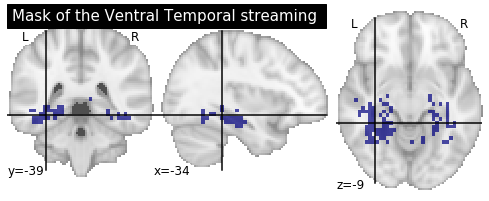

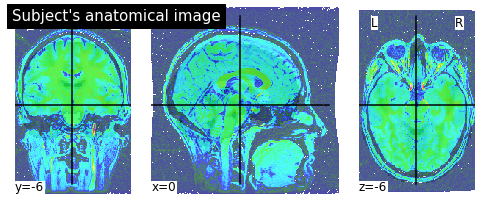

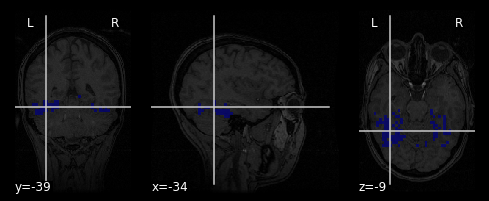

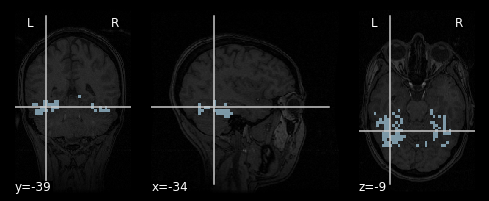

In [3]:
mask_filename = haxby_dataset.mask_vt[0]
plotting.plot_roi(mask_filename,title="Mask of the Ventral Temporal streaming ")
plotting.plot_roi(haxby_dataset.anat[0], title="Subject's anatomical image")
plotting.plot_roi(mask_filename,bg_img=haxby_dataset.anat[0])
plotting.plot_roi(mask_filename,bg_img=haxby_dataset.anat[0], cmap="Paired")

In [4]:
print(type(mask_filename),type(haxby_dataset.anat[0]))
print(mask_filename,haxby_dataset.anat[0])
masker = NiftiMasker(mask_img=mask_filename, standardize=True)
fmri_filename = haxby_dataset.func[0]

# We give the masker a filename and retrieve a 2D array ready
# for machine learning with scikit-learn
fmri_masked = masker.fit_transform(fmri_filename)
print(fmri_masked)

<class 'str'> <class 'str'>
/home/krutika/nilearn_data/haxby2001/subj2/mask4_vt.nii.gz /home/krutika/nilearn_data/haxby2001/subj2/anat.nii.gz
[[ 7.6757914e-01  2.3108709e+00 -2.0519446e-01 ... -1.0261141e+00
   8.7993503e-02  2.0720530e+00]
 [ 5.5640829e-01  1.6833442e+00 -2.4644940e-01 ... -7.0238096e-01
  -3.4570050e-01  2.0341012e+00]
 [ 7.6757914e-01  1.9186667e+00  1.0802227e-03 ... -9.9374086e-01
  -2.7630946e-01  2.1479564e+00]
 ...
 [-4.2905572e-01 -1.6896113e+00 -7.4150860e-01 ... -1.5440873e+00
   1.8054218e+00 -1.6709729e-01]
 [-1.4749458e-01 -1.8072726e+00 -2.4644940e-01 ... -1.7707006e+00
   1.5452055e+00  7.8169519e-01]
 [-2.1788488e-01 -1.4542887e+00  1.0802227e-03 ... -1.6412073e+00
   1.2676412e+00  8.9555031e-01]]


In [5]:
fmri_masked.shape

(1452, 464)

In [6]:
import nibabel

In [7]:
data = nibabel.load(fmri_filename).get_data()
mask = nibabel.load(mask_filename).get_data()
print(data.shape)
print(mask.shape)

(40, 64, 64, 1452)
(40, 64, 64)
